# Ultimate Data Science Challenge

### Pt. I Exploratory Data Analysis

The logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

In [2]:
with open('logins.json', 'r') as l:
    data = json.load(l)
type(data)

dict

In [3]:
data.keys()

dict_keys(['login_time'])

In [4]:
data['login_time'][:10]

['1970-01-01 20:13:18',
 '1970-01-01 20:16:10',
 '1970-01-01 20:16:37',
 '1970-01-01 20:16:36',
 '1970-01-01 20:26:21',
 '1970-01-01 20:21:41',
 '1970-01-01 20:12:16',
 '1970-01-01 20:35:47',
 '1970-01-01 20:35:38',
 '1970-01-01 20:47:52']

In [5]:
# Create a dataframe out of the dictionary, set the timestamps to the index, and make them datetime objects
logins = pd.DataFrame(data, index = pd.to_datetime(data['login_time']))

In [6]:
logins.head()

,login_time
1970-01-01 20:13:18,1970-01-01 20:13:18
1970-01-01 20:16:10,1970-01-01 20:16:10
1970-01-01 20:16:37,1970-01-01 20:16:37
1970-01-01 20:16:36,1970-01-01 20:16:36
1970-01-01 20:26:21,1970-01-01 20:26:21


In [7]:
logins.isna().sum()

login_time    0
dtype: int64

In [8]:
# Resample the login time stamps into 15 minute intervals while aggregating the number of logins per interval in new column
logins = logins.resample('15T').count()

In [9]:
logins.head()

,login_time
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [10]:
# Use a proper name for the login counts
logins.rename({'login_time': 'login_count'}, axis = 1, inplace = True)

In [11]:
# Create new column with day of the week name
logins['day_of_week'] = logins.index.day_name()
logins.head()

,login_count,day_of_week
1970-01-01 20:00:00,2,Thursday
1970-01-01 20:15:00,6,Thursday
1970-01-01 20:30:00,9,Thursday
1970-01-01 20:45:00,7,Thursday
1970-01-01 21:00:00,1,Thursday


In [12]:
# Create new column showing whether the login was a weekday or weekend
part_of_week = []
weekend = ['Saturday', 'Sunday']
for day in logins['day_of_week']:
    if day in weekend:
        part_of_week.append('Weekend')
    else:
        part_of_week.append('Weekday')
logins['weekday_or_weekend'] = part_of_week

In [13]:
logins.head()

,login_count,day_of_week,weekday_or_weekend
1970-01-01 20:00:00,2,Thursday,Weekday
1970-01-01 20:15:00,6,Thursday,Weekday
1970-01-01 20:30:00,9,Thursday,Weekday
1970-01-01 20:45:00,7,Thursday,Weekday
1970-01-01 21:00:00,1,Thursday,Weekday


In [14]:
# Create new column with just the hour of the login timestamp
hours = []
for timestamp in range(len(logins)):
    hours.append(datetime.strftime(logins.index[timestamp], '%H'))
logins['hour'] = pd.to_numeric(hours)

In [15]:
logins.head()

,login_count,day_of_week,weekday_or_weekend,hour
1970-01-01 20:00:00,2,Thursday,Weekday,20
1970-01-01 20:15:00,6,Thursday,Weekday,20
1970-01-01 20:30:00,9,Thursday,Weekday,20
1970-01-01 20:45:00,7,Thursday,Weekday,20
1970-01-01 21:00:00,1,Thursday,Weekday,21


In [16]:
# Just checking the hours to make sure they're not zero padded
list_of_hours = np.sort(logins['hour'].unique())
list_of_hours

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [17]:
# Create new column to categorize login time stamps as occuring in the night, morning, afternoon, or evening
# Between the hours of 21:00 and 05:00 is night
# Between the hours of 05:00 and 12:00 is morning
# Between the hours of 12:00 and 17:00 is afternoon
# Between the hours of 17:00 and 21:00 is evening
time_of_day = []
for hour in logins['hour']:
    if 5 > hour:
        time_of_day.append('Night')
    elif 5 <= hour < 12:
        time_of_day.append('Morning')
    elif 12 <= hour < 17:
        time_of_day.append('Afternoon')
    elif 17 <= hour < 21:
        time_of_day.append('Evening')
    else:
        time_of_day.append('Night')
logins['part_of_day'] = time_of_day

In [18]:
logins.sample(10)

,login_count,day_of_week,weekday_or_weekend,hour,part_of_day
1970-01-09 22:30:00,14,Friday,Weekday,22,Night
1970-03-03 10:45:00,7,Tuesday,Weekday,10,Morning
1970-04-08 21:15:00,16,Wednesday,Weekday,21,Night
1970-03-15 01:00:00,27,Sunday,Weekend,1,Night
1970-02-14 17:45:00,9,Saturday,Weekend,17,Evening
1970-02-26 16:15:00,7,Thursday,Weekday,16,Afternoon
1970-02-10 17:45:00,0,Tuesday,Weekday,17,Evening
1970-01-19 22:15:00,9,Monday,Weekday,22,Night
1970-04-08 10:45:00,15,Wednesday,Weekday,10,Morning
1970-03-09 19:15:00,4,Monday,Weekday,19,Evening


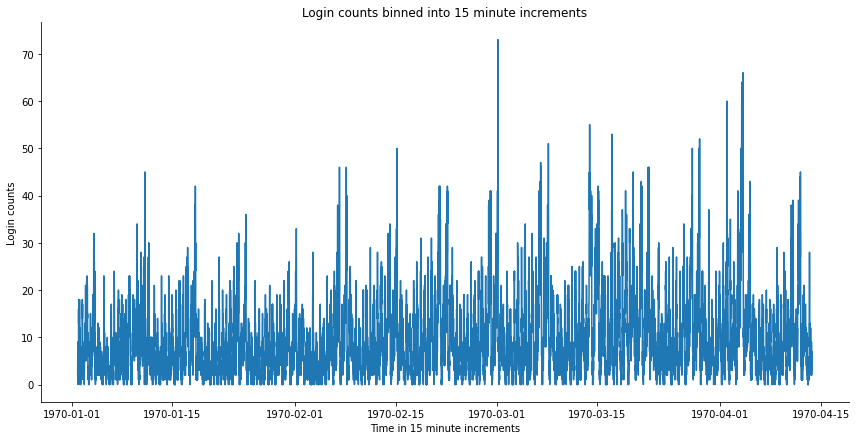

In [19]:
# Line plot of the aggregated login data
sns.relplot(data = logins, x = logins.index, y = 'login_count', kind = 'line', height = 6, aspect = 2)
plt.xlabel('Time in 15 minute increments')
plt.ylabel('Login counts')
plt.title('Login counts binned into 15 minute increments')
plt.show()

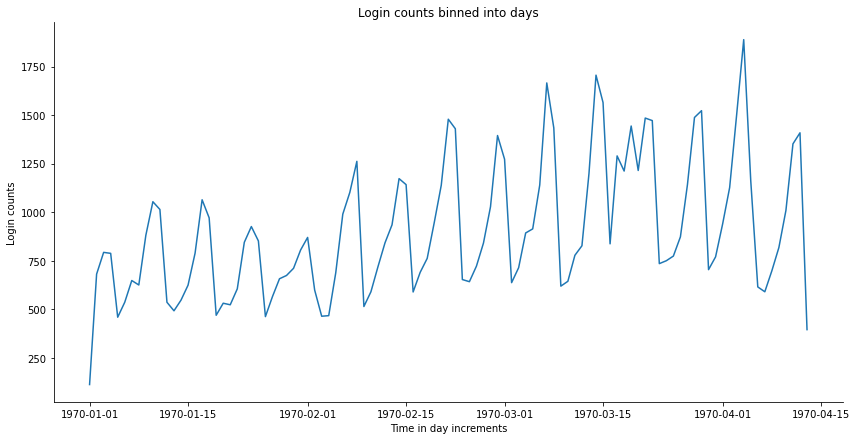

In [20]:
# Same plot as above but resampled to 1 day increments
sns.relplot(data = logins.resample('1D').sum(), x = logins.resample('1D').sum().index, y = 'login_count', 
            kind = 'line', height = 6, aspect = 2)
plt.xlabel('Time in day increments')
plt.ylabel('Login counts')
plt.title('Login counts binned into days')
plt.show()

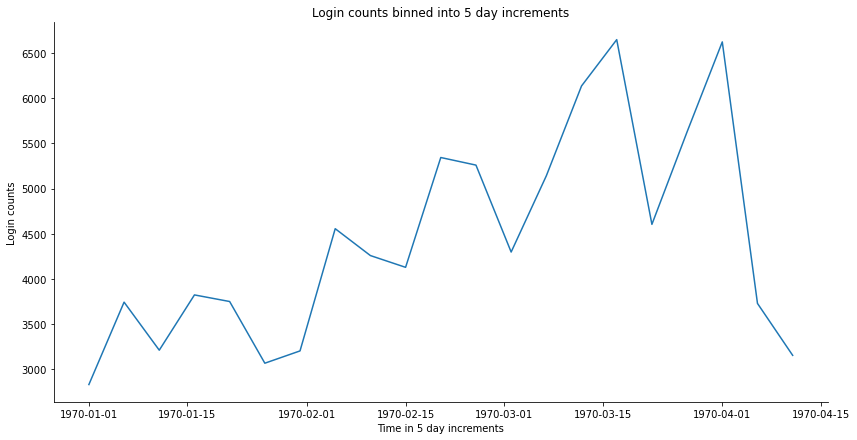

In [21]:
# Resampled again to 5 day increments
sns.relplot(data = logins.resample('5D').sum(), x = logins.resample('5D').sum().index, y = 'login_count', 
            kind = 'line', height = 6, aspect = 2)
plt.xlabel('Time in 5 day increments')
plt.ylabel('Login counts')
plt.title('Login counts binned into 5 day increments')
plt.show()

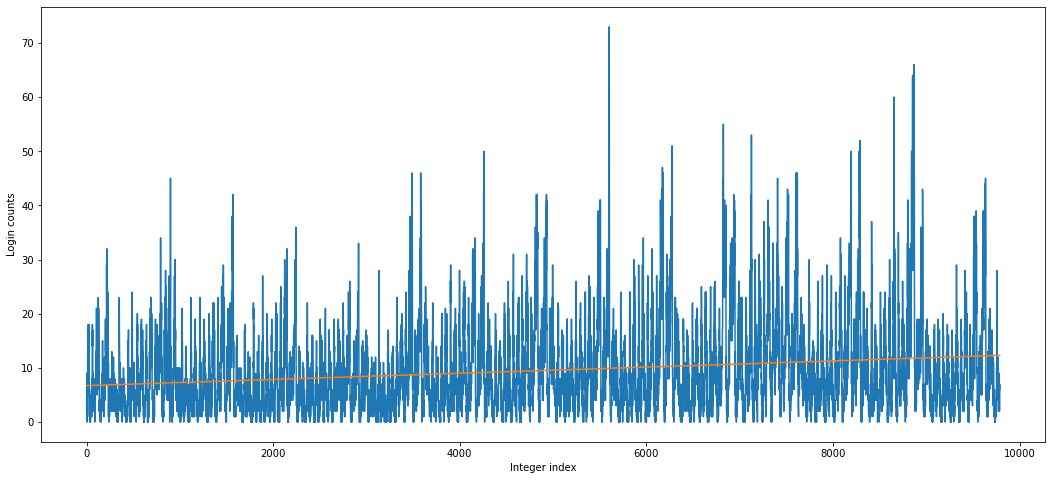

In [22]:
from sklearn.linear_model import LinearRegression

# fit linear model
X = [i for i in range(0, len(logins))]
X = np.reshape(X, (-1, 1))
y = logins['login_count'].values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
fig = plt.figure()
fig.set_size_inches(18, 8)
plt.plot(y)
plt.plot(trend)
plt.xlabel('Integer index')
plt.ylabel('Login counts')
plt.show()

In [23]:
print('The slope of the regression line is', round(model.coef_[0], 5))

The slope of the regression line is 0.00057


There doesn't appear to by much of a trend to login counts, but there does appear to be some daily or weekly seasonality. Variance is quite high.

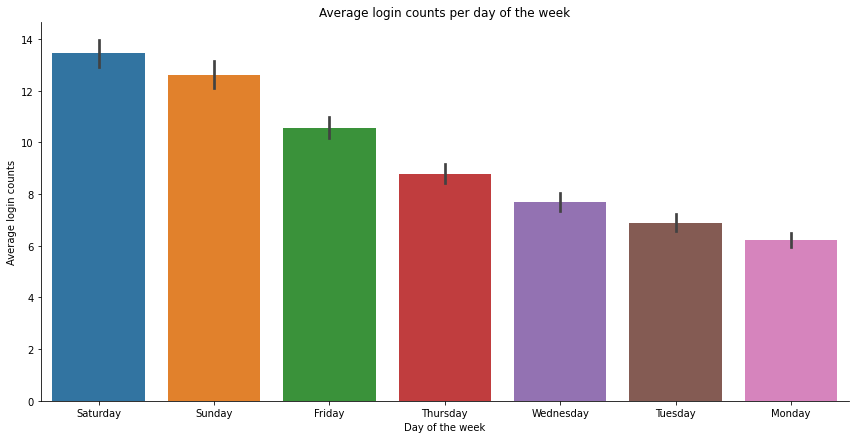

In [24]:
# Bar plot of average number of logins per day of the week
order = logins.groupby('day_of_week')['login_count'].mean().sort_values()

sns.catplot(data = logins, x = 'day_of_week', y = 'login_count', kind = 'bar', height = 6, aspect = 2,
            order = logins.groupby('day_of_week').mean()['login_count'].sort_values(ascending = False).index)
plt.xlabel('Day of the week')
plt.ylabel('Average login counts')
plt.title('Average login counts per day of the week')
plt.show()

In [25]:
logins.groupby('day_of_week').mean()['login_count'].sort_values(ascending = False)

day_of_week
Saturday     13.456250
Sunday       12.615972
Friday       10.561111
Thursday      8.794118
Wednesday     7.692708
Tuesday       6.895833
Monday        6.213380
Name: login_count, dtype: float64

Clearly the weekend sees more login activity than the week days. Activity is lowest on Monday and builds up steadily throughout the week until the maximum on Saturday. Saturday and Sunday see about double the average logins that Monday or Tuesday do.

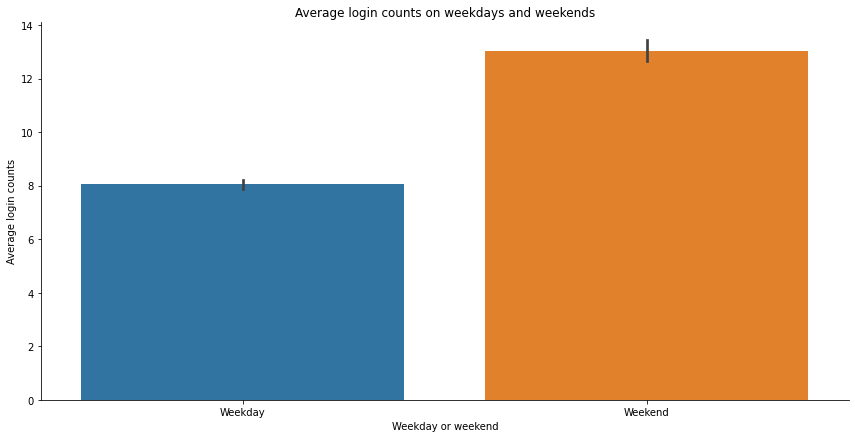

In [26]:
# Bar plot of number of logins on weekdays and weekends
sns.catplot(data = logins, x = 'weekday_or_weekend', y = 'login_count', kind = 'bar', height = 6, aspect = 2)
plt.xlabel('Weekday or weekend')
plt.ylabel('Average login counts')
plt.title('Average login counts on weekdays and weekends')
plt.show()

In [27]:
part_of_week_avgs = logins.groupby('weekday_or_weekend')['login_count'].mean()
part_of_week_avgs

weekday_or_weekend
Weekday     8.048350
Weekend    13.036111
Name: login_count, dtype: float64

In [28]:
round(part_of_week_avgs['Weekend'] / part_of_week_avgs['Weekday'], 2)

1.62

Another graph confirming our observation that the weekend sees much more login activity than the weekdays do. Despite only being two days of the week compared to the five that comprise weekdays, weekends see 162% of the login activity of weekdays.

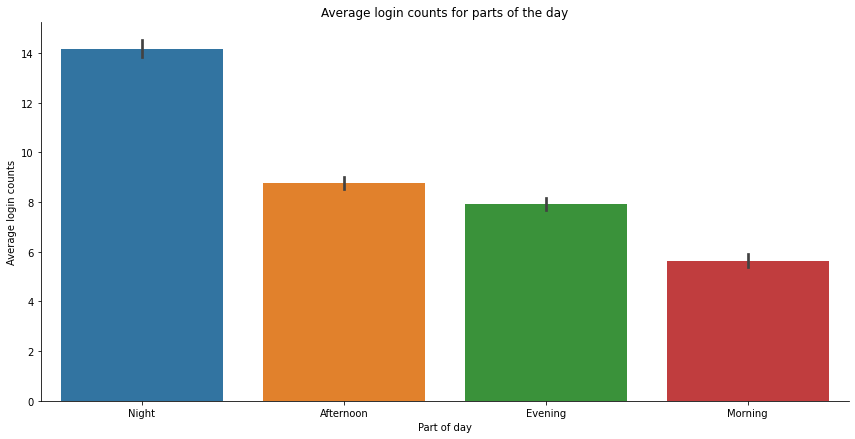

In [29]:
# Bar plot of average number of logins for parts of day
order = logins.groupby('part_of_day').mean()['login_count'].sort_values(ascending = False).index

sns.catplot(data = logins, x = 'part_of_day', y = 'login_count', kind = 'bar', height = 6, aspect = 2, order = order)
plt.xlabel('Part of day')
plt.ylabel('Average login counts')
plt.title('Average login counts for parts of the day')
plt.show()

In [30]:
logins.groupby('part_of_day').mean()['login_count'].sort_values(ascending = False)

part_of_day
Night        14.173713
Afternoon     8.760294
Evening       7.925061
Morning       5.639356
Name: login_count, dtype: float64

Users are logging in at night much more often than other parts of the day. Afternoon and evening are well below night time numbers. Morning trails last at a little more than 33% of night's numbers.

The quick summary:

- Login activity is far more frequent on the weekend.
- Login activity is far more frequent in the evening.

One important thing to think about is whether the login timestamps given are in UTC or local timezones, and where the users are logging in if the latter. This matters for the the daily login trends. If the timestamps are a local time zone, and the users are all logging in from that timezone, than the night/morning/afternoon/evening feature is consistent. If not, then it is an inconsistent feature. 

### Pt. II Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a) how you will implement the experiment

b) what statistical test(s) you will conduct to verify the significance of the
observation

c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do
not need this information to answer Part 2.


1. The key measure of success would be profit earned during a test period of time. It seems that what is being tested is whether reimbursing drivers the cost of the bridge toll will result in more or less profit for Ultimate. I am assuming Ultimate Gotham and Ultimate Metropolis both belong to Ultimate, and so a win for one is a win for the whole company. Reimbursing toll costs to drivers costs Ultimate money and represents a loss in profit. However, the question is whether Ultimate drivers will take advantage of the zero cost intercity mobility to facilitate more frequent and/or longer rides to customers to the point that the increased revenue becomes greater than the cost of the bridge tolls, resulting in greater profit. Profit earned during a test period must be compared to the profit Ultimate would normally earn in the same time period had they not implemented the bridge toll reimbursement program.

2. Here is the experiment I would design to test whether the bridge toll reimbursement program would be worth it.

- Hypothesis: Reimbursing drivers for the cost of the bridge toll would increase profit.
- Null hypothesis: Reimbursing drivers for the cost of the bridge toll would not increase profit. Ultimate would be better off not moving forward with the bridge toll reimbursement program.

Designate a trial period of, say, two months where Ultimate will implement the bridge toll reimbursements. Record the profits of this two month trial period. Take the difference between the two month trial period's profit and last years profit during the same two months. If the difference is positive, the null hypothesis is disconfirmed and we'd adopt the attitude that reimbursing drivers does increase profit. If the difference is negative, we reject our hypothesis. 

The statistical test from which this test is based on is called difference of differences. The two month period that occurred a year prior is meant to *represent* a control group, where the effect of the bridge toll reimbursement is absent. It is important to note that the historical two month period is representing a control group, and not literally embodying it. That trial and the current trial are occurring/have occurred at different times, so not every factor besides the explanatory varible is identical. The profit in this period is assumed to be what the profit of the experimental group's two month period *would have been* without the intervention of the explanatory variable -- the bridge toll reimbursement. We then difference the profit in the experimental group with the profit in our control group to see if the independent variable had any effect.

### Pt. III Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

Data description

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYYMMDD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

### Part 3.1 Data Cleaning

In [31]:
with open('ultimate_data_challenge.json', 'r') as f:
    data = json.load(f)
type(data)

list

In [32]:
data[:3]

[{'city': "King's Landing",
  'trips_in_first_30_days': 4,
  'signup_date': '2014-01-25',
  'avg_rating_of_driver': 4.7,
  'avg_surge': 1.1,
  'last_trip_date': '2014-06-17',
  'phone': 'iPhone',
  'surge_pct': 15.4,
  'ultimate_black_user': True,
  'weekday_pct': 46.2,
  'avg_dist': 3.67,
  'avg_rating_by_driver': 5.0},
 {'city': 'Astapor',
  'trips_in_first_30_days': 0,
  'signup_date': '2014-01-29',
  'avg_rating_of_driver': 5.0,
  'avg_surge': 1.0,
  'last_trip_date': '2014-05-05',
  'phone': 'Android',
  'surge_pct': 0.0,
  'ultimate_black_user': False,
  'weekday_pct': 50.0,
  'avg_dist': 8.26,
  'avg_rating_by_driver': 5.0},
 {'city': 'Astapor',
  'trips_in_first_30_days': 3,
  'signup_date': '2014-01-06',
  'avg_rating_of_driver': 4.3,
  'avg_surge': 1.0,
  'last_trip_date': '2014-01-07',
  'phone': 'iPhone',
  'surge_pct': 0.0,
  'ultimate_black_user': False,
  'weekday_pct': 100.0,
  'avg_dist': 0.77,
  'avg_rating_by_driver': 5.0}]

In [33]:
users = pd.DataFrame(data)
users.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [34]:
users.shape

(50000, 12)

In [35]:
users.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [36]:
users.isna().sum()['avg_rating_by_driver'] / len(users)

0.00402

In [37]:
# Average rating by driver is only missing from 0.4% of users. Drop it
users.dropna(axis = 0, subset = ['avg_rating_by_driver'], inplace = True)

In [38]:
users.isna().sum()['phone'] / len(users)

0.007891724733428382

In [39]:
# Drop the missing phone values for the same reason as above. The amount of missing values is small enough to drop
users.dropna(axis = 0, subset = ['phone'], inplace = True)

In [40]:
users.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      7961
avg_surge                    0
last_trip_date               0
phone                        0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver         0
dtype: int64

In [41]:
# 16% of users are missing information for average rating of driver. This is too much to drop
users.isna().sum()['avg_rating_of_driver'] / len(users)

0.16113427518924828

In [42]:
users['avg_rating_of_driver'].describe()

count    41445.000000
mean         4.601720
std          0.616104
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

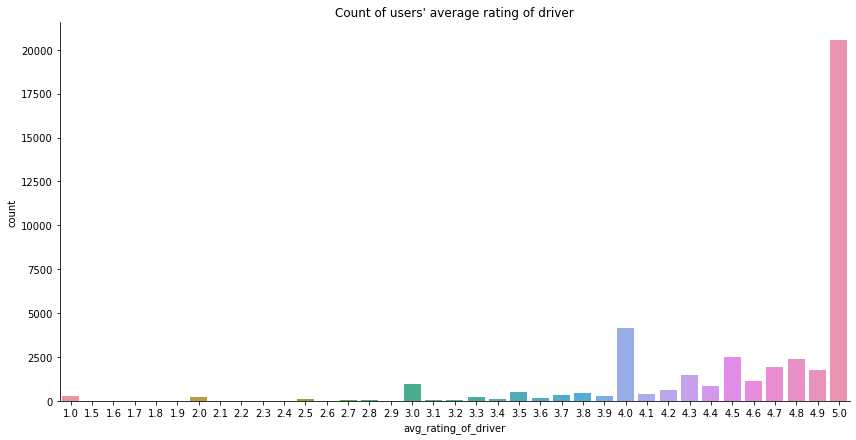

In [43]:
# Most people, on average, rated above 4.8.
sns.catplot(data = users, x = 'avg_rating_of_driver', kind = 'count', height = 6, aspect = 2)
plt.title("Count of users' average rating of driver")
plt.show()

In [44]:
# This distribution is left skewed. We'll impute the median average rating of driver
users['avg_rating_of_driver']=users['avg_rating_of_driver'].fillna(users['avg_rating_of_driver'].median())

In [45]:
users.isna().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [46]:
users.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [47]:
# Our next move will be easier if the last trip column is a datetime object 
# Change ultimate black user column to a numeric data type
users['last_trip_date'] = pd.to_datetime(users['last_trip_date'])
users['ultimate_black_user'].replace({True: 1, False: 0}, inplace = True)

We're asked to predict to predict rider retention. We're also told what qualifies as a retained rider, which is necessary if we're to train a model to predict such a thing. A retained user is defined as user who has been active, and someone who has been active is defined as someone who has taken a trip "in the preceding 30 days." Therefore, we'd like to build an "active user" feature into our dataset. The challenge here is the decision we need to make about which 30 days are the 30 preceding days mentioned in the prompt. Preceding which day? We're going to make an assumption. We will take the most recent ride date and assume the 30 days preceeding that date are the days a user will have had to have a ride in order to be considered an active user.

In [48]:
# This is the date we're assuming the data was pulled
assumed_study_date = users['last_trip_date'].max()
assumed_study_date

Timestamp('2014-07-01 00:00:00')

In [49]:
# Build a feature classifying users into active or not active 
for i, r in users.iterrows(): # i is the index, r is the data in that row
    diff = (assumed_study_date - r['last_trip_date']).days # difference between global and ith row's most recent ride
    active = int(diff <= 30) # 1 if difference is less than or equal to 30 days, 0 otherwise
    users.loc[i, 'active'] = active # Instantiate 'active' column and fill active value at row i

In [50]:
# This column is no longer needed after building our new active column. We also don't need the signup date
users.drop(columns = 'last_trip_date', inplace = True)
users.drop(columns = 'signup_date', inplace = True)

In [51]:
# Anything before June 1st (30 days preceding July 1st) should be 0 for active status. 1 if after June 1st
users.sample(10)

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
16214,Winterfell,1,4.9,1.00,Android,0.0,0,50.0,3.12,5.0,0.0
41698,Astapor,0,4.0,1.00,iPhone,0.0,0,0.0,6.30,5.0,1.0
41898,King's Landing,6,5.0,1.02,iPhone,7.1,0,78.6,3.04,5.0,1.0
33101,Winterfell,0,5.0,1.00,iPhone,0.0,0,0.0,1.33,5.0,0.0
31837,Astapor,1,5.0,1.00,iPhone,0.0,0,0.0,4.11,5.0,0.0
2810,King's Landing,9,4.7,1.27,iPhone,14.3,1,42.9,2.29,3.9,0.0
7667,King's Landing,0,4.5,1.00,iPhone,0.0,0,100.0,9.91,5.0,1.0
39447,Astapor,0,5.0,1.00,iPhone,0.0,1,0.0,25.84,5.0,1.0
2579,Winterfell,2,5.0,1.00,iPhone,0.0,1,0.0,7.34,3.5,1.0
30017,Winterfell,1,3.5,1.00,iPhone,0.0,0,25.0,5.38,4.8,0.0


### Part 3.2 Exploratory Data Analysis

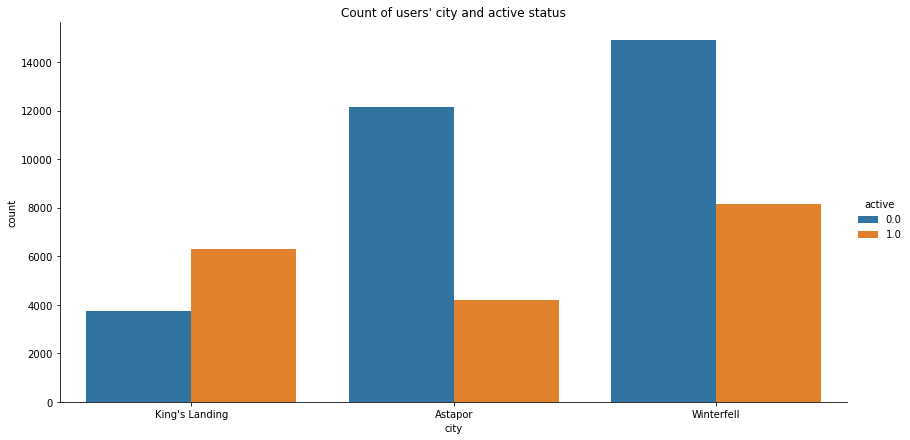

In [52]:
# Most people ride out of Winterfell. King's Landing is the only city where active users outnumber inactive users
sns.catplot(data = users, x = 'city', hue = 'active', kind = 'count', height = 6, aspect = 2)
plt.title("Count of users' city and active status")
plt.show()

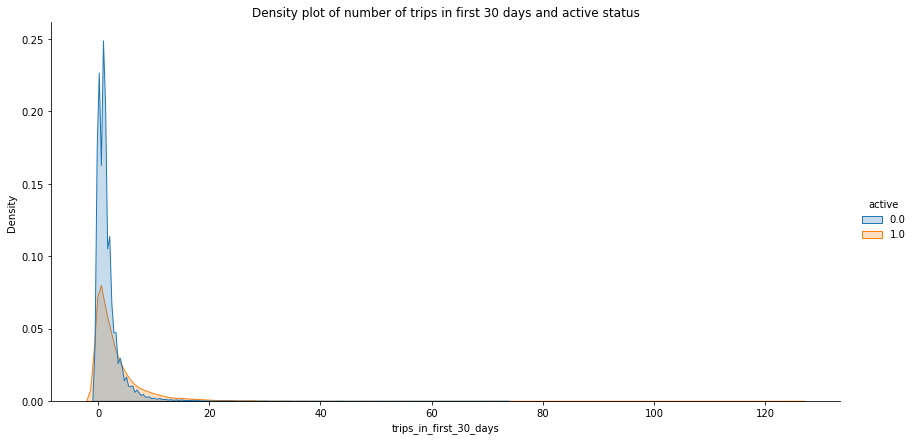

In [53]:
# Huge left skew on this column
sns.displot(data = users, x = 'trips_in_first_30_days', hue = 'active', kind = 'kde', height = 6, aspect = 2, fill = True)
plt.title("Density plot of number of trips in first 30 days and active status")
plt.show()

In [54]:
users['trips_in_first_30_days'].describe()

count    49406.000000
mean         2.284176
std          3.799164
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        125.000000
Name: trips_in_first_30_days, dtype: float64

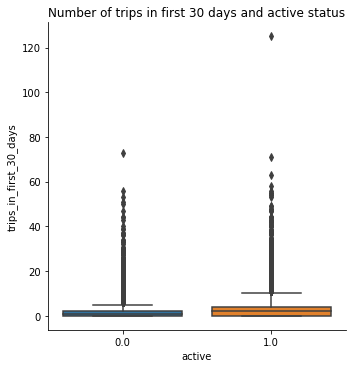

In [55]:
# The top 25% of users took many many times more rides than the average
sns.catplot(data = users, x = 'active', y = 'trips_in_first_30_days', kind = 'box')
plt.title("Number of trips in first 30 days and active status")
plt.show()

In [56]:
values = []
for quantile in np.arange(0.980, 0.999, 0.001):
    values.append(users['trips_in_first_30_days'].quantile(q = quantile))
table = pd.DataFrame({'quantiles': [quantile for quantile in np.arange(0.980, 0.999, 0.001)], 'values': values, })
table
# 0.01% of users have ridden 37 or more times in the first 30 days. 

,quantiles,values
0,0.980,14.0
1,0.981,14.0
2,0.982,15.0
3,0.983,15.0
4,0.984,15.0
5,0.985,16.0
6,0.986,16.0
7,0.987,17.0
8,0.988,17.0
9,0.989,18.0


In [57]:
normal_users = users[users['trips_in_first_30_days'] < 37]
power_users = users[users['trips_in_first_30_days'] > 37]

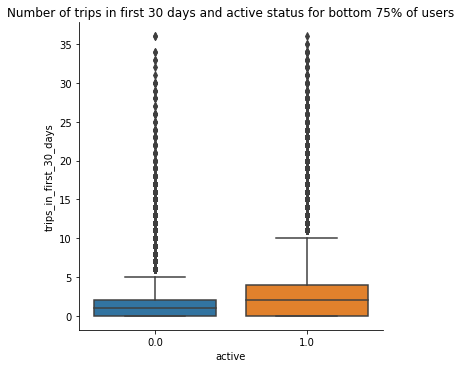

In [58]:
sns.catplot(data = normal_users, x = 'active', y = 'trips_in_first_30_days', kind = 'box')
plt.title("Number of trips in first 30 days and active status for bottom 75% of users")
plt.show()

In [59]:
# These power users account for so little of the data and are such absurd outliers that we will remove them
len(power_users), len(power_users) / len(users)

(47, 0.0009513014613609683)

In [60]:
users.drop(users[users['trips_in_first_30_days'] > 37].index, inplace = True)

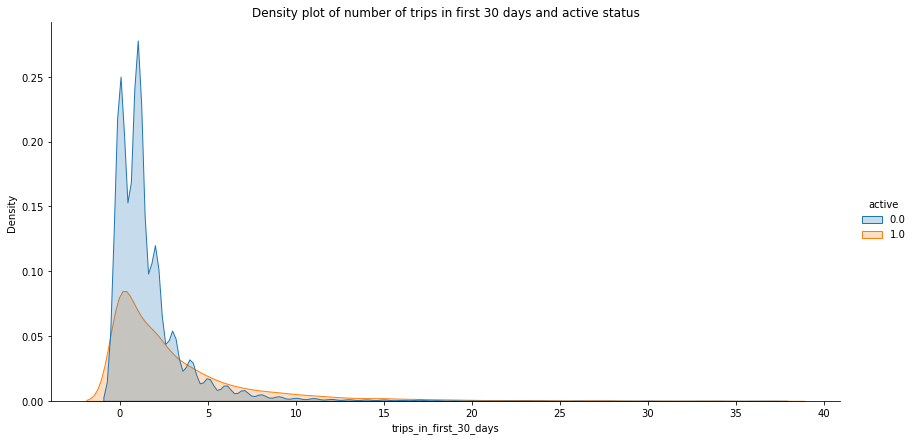

In [61]:
# Distribution looks more reasonable now
sns.displot(data = users, x = 'trips_in_first_30_days', hue = 'active', kind = 'kde', height = 6, aspect = 2, fill = True)
plt.title("Density plot of number of trips in first 30 days and active status")
plt.show()

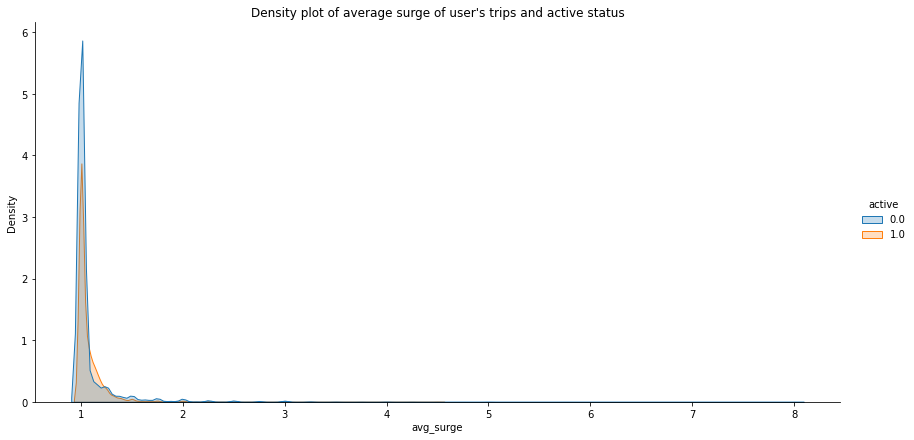

In [62]:
# Average surge is very skewed as well
sns.displot(data = users, x = 'avg_surge', hue = 'active', kind = 'kde', height = 6, aspect = 2, fill = True)
plt.title("Density plot of average surge of user's trips and active status")
plt.show()

In [63]:
users['avg_surge'].describe()

count    49359.000000
mean         1.074628
std          0.221106
min          1.000000
25%          1.000000
50%          1.000000
75%          1.050000
max          8.000000
Name: avg_surge, dtype: float64

In [64]:
values = []
for quantile in np.arange(0.980, 0.999, 0.001):
    values.append(users['avg_surge'].quantile(q = quantile))
table = pd.DataFrame({'quantiles': [quantile for quantile in np.arange(0.980, 0.999, 0.001)], 'values': values, })
table
# 0.01% of users have an average surge of more than 3.25. The max is 8. We can drop some outliers here too 

,quantiles,values
0,0.980,1.75
1,0.981,1.75
2,0.982,1.75
3,0.983,1.75
4,0.984,1.85
5,0.985,1.88
6,0.986,2.00
7,0.987,2.00
8,0.988,2.00
9,0.989,2.00


In [65]:
users.drop(users[users['avg_surge'] > 3.25].index, inplace = True)

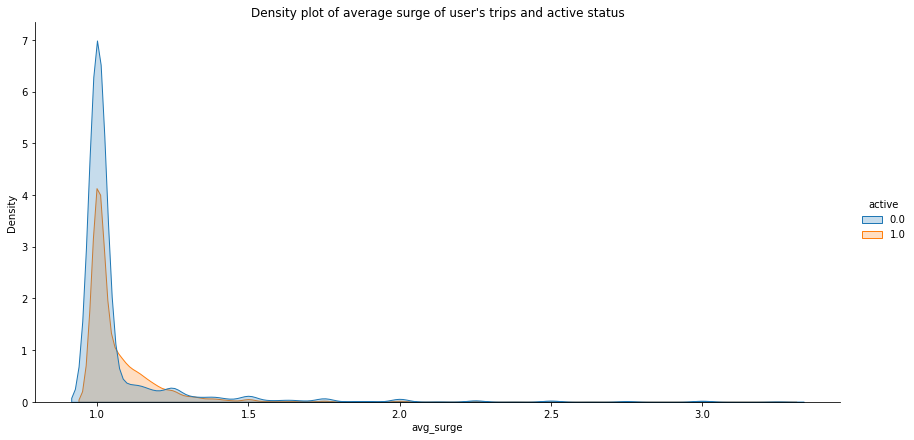

In [66]:
# Looks better
sns.displot(data = users, x = 'avg_surge', hue = 'active', kind = 'kde', height = 6, aspect = 2, fill = True)
plt.title("Density plot of average surge of user's trips and active status")
plt.show()

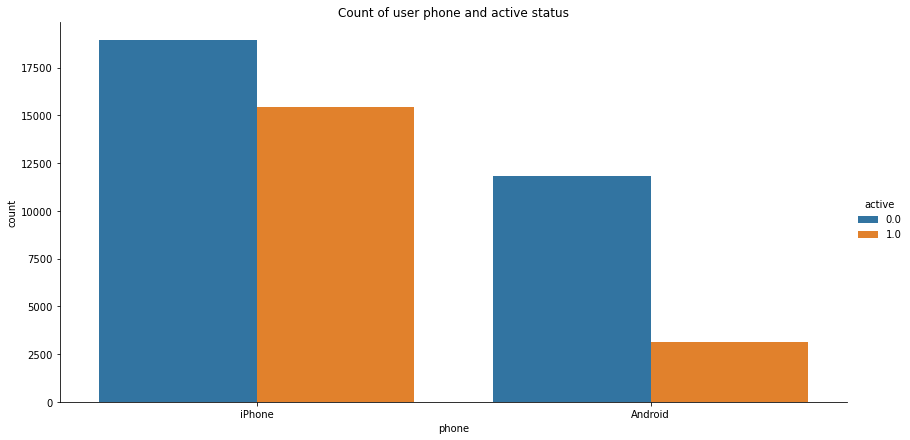

In [67]:
# Most people are iPhone users 
sns.catplot(data = users, x = 'phone', hue = 'active', kind = 'count', height = 6, aspect = 2)
plt.title("Count of user phone and active status")
plt.show()

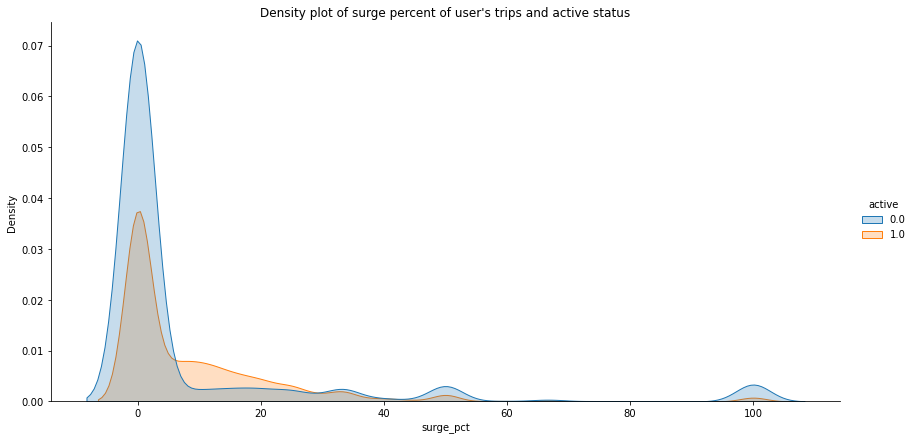

In [68]:
# Surge percent has outliers, but they're not so severe that we're inclined to remove them
sns.displot(data = users, x = 'surge_pct', hue = 'active', kind = 'kde', height = 6, aspect = 2, fill = True)
plt.title("Density plot of surge percent of user's trips and active status")
plt.show()

In [69]:
users['surge_pct'].describe()

count    49317.000000
mean         8.770410
std         19.728328
min          0.000000
25%          0.000000
50%          0.000000
75%          8.700000
max        100.000000
Name: surge_pct, dtype: float64

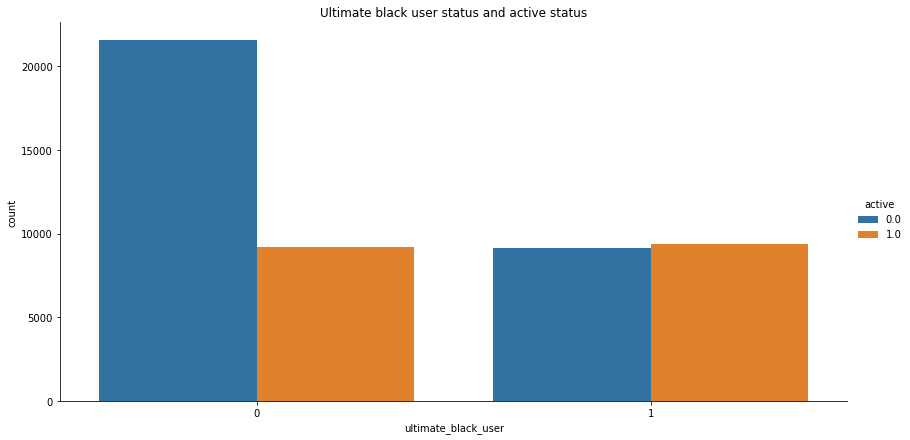

In [70]:
# It seems that inactive users are much more likely to not be ultimate black users. Active users are pretty split
sns.catplot(data = users, x = 'ultimate_black_user', hue = 'active', kind = 'count', height = 6, aspect = 2)
plt.title("Ultimate black user status and active status")
plt.show()

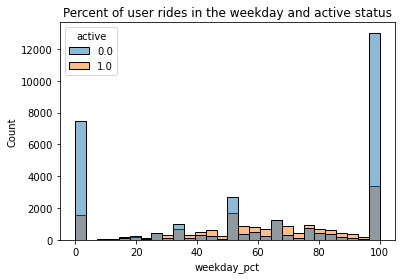

In [71]:
# A bimodal distribution. Almost trimodal. Many people are exclusive weekday riders, many are exclusive weekend riders
sns.histplot(data = users, x = 'weekday_pct', hue = 'active')
plt.title("Percent of user rides in the weekday and active status")
plt.show()

In [72]:
users['weekday_pct'].describe()

count    49317.000000
mean        60.910313
std         37.023544
min          0.000000
25%         33.300000
50%         66.700000
75%        100.000000
max        100.000000
Name: weekday_pct, dtype: float64

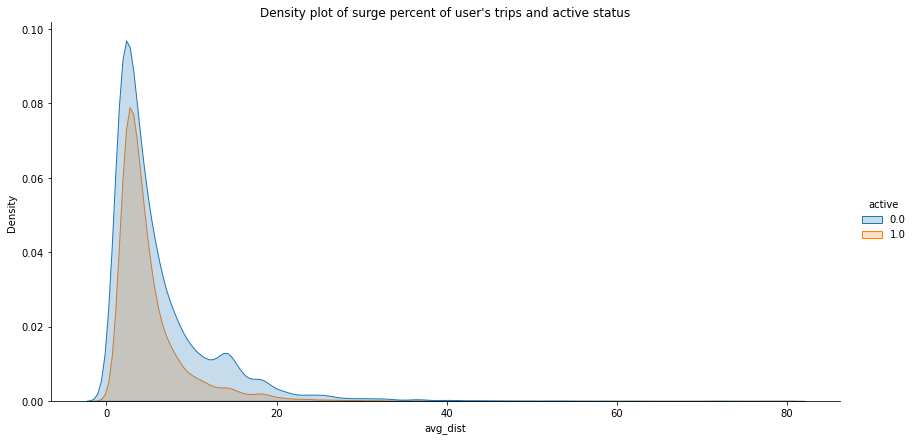

In [73]:
# Most users ride less than seven miles
sns.displot(data = users, x = 'avg_dist', hue = 'active', kind = 'kde', height = 6, aspect = 2, fill = True)
plt.title("Density plot of surge percent of user's trips and active status")
plt.show()

In [74]:
users['avg_dist'].describe()

count    49317.000000
mean         5.788217
std          5.630448
min          0.000000
25%          2.420000
50%          3.880000
75%          6.940000
max         79.690000
Name: avg_dist, dtype: float64

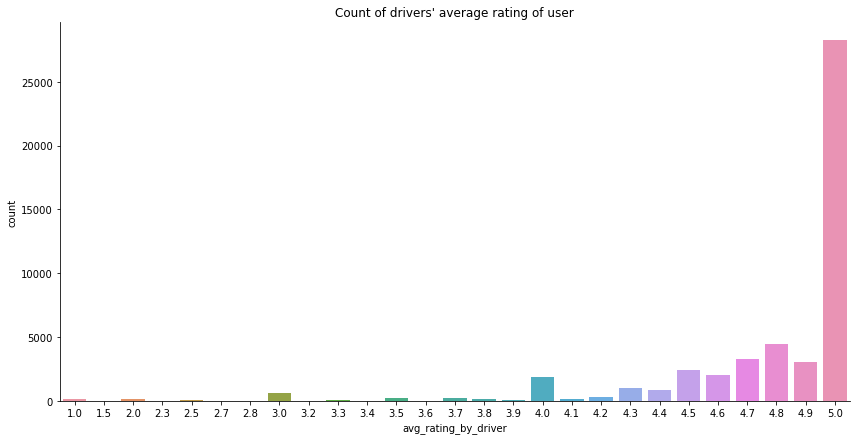

In [75]:
# Most drivers rate 5.0
sns.catplot(data = users, x = 'avg_rating_by_driver', kind = 'count', height = 6, aspect = 2)
plt.title("Count of drivers' average rating of user")
plt.show()

In [76]:
# We only lost less than 2% of our data from all the data we've dropped
users.shape, len(users)/50000

((49317, 11), 0.98634)

### Part 3.3 Preprocessing and Modeling

In [77]:
users.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [78]:
users.phone.unique()

array(['iPhone', 'Android'], dtype=object)

In [79]:
# OneHot encode these non numeric columns for modeling
users = pd.get_dummies(users)

In [80]:
users.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,1.0,0,1,0,0,1
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,0.0,1,0,0,1,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,0.0,1,0,0,0,1
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,1.0,0,1,0,0,1
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,0.0,0,0,1,1,0


In [81]:
# Create numpy arrays of our dependent variable (active status) and independent variables (everything else)
X, y = users.drop(columns = 'active').to_numpy(), users['active'].to_numpy()

In [82]:
# Create train test splits. 20% of data reserved for testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [83]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

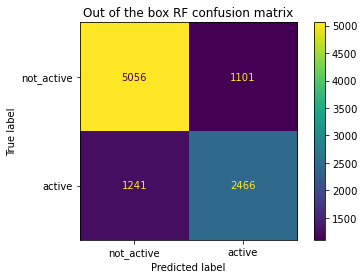

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

target_names = ['not_active', 'active']
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = target_names)
disp.plot()
plt.title('Out of the box RF confusion matrix')

plt.show()

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

  not_active       0.80      0.82      0.81      6157
      active       0.69      0.67      0.68      3707

    accuracy                           0.76      9864
   macro avg       0.75      0.74      0.74      9864
weighted avg       0.76      0.76      0.76      9864



In [86]:
# Get feature importances from random forest model object
feature_importance = rf.feature_importances_

# Get a sorted list of feature importance indicies, ascending. 
sorted_idx = np.argsort(feature_importance)

# Make two lists that correspond to each other: sorted feature names and sorted feature importances 
sorted_feature_names = []
for i in sorted_idx:
    sorted_feature_names.append(users.drop(columns = 'active').columns[i])

sorted_feature_importances = []
for i in sorted_idx:
    sorted_feature_importances.append(feature_importance[i])

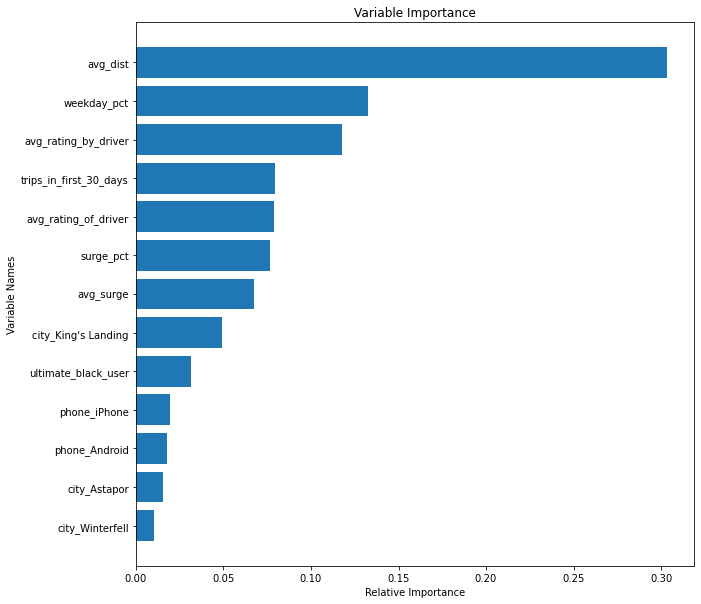

In [87]:
# Plot the relative feature importances to see the best predictors of heart disease
plt.figure(figsize=(10,10))
plt.barh(y = sorted_feature_names, width = sorted_feature_importances)
plt.xlabel('Relative Importance')
plt.ylabel('Variable Names')
plt.title('Variable Importance')
plt.show()

Given more time we would tune some hyperparameters of this random forest model. Definitely test out some different max depths and decision tree criteria, as well as at least 5 fold cross validation. For now, this is an example of how I would go about modeling this data set. In summary:

- We kept 98.6% of the data after deleting rows with missing values and rows with outliers.
- We used a random forest decision tree classifier to predict whether users are active or not. The untuned model has a 76% accuracy rate. It has a higher precision than recall score, meaning it correctly classifies active users a little better than inactive users. It seemed appropriate to use a random forest model for a a few reasons:

    1) This is a classification problem, which decision trees can handle
    
    2) The features are numeric and categorical, which decision trees can handle
    
    
- Leveraging this model in future means handing off chunks of user data to the data science team each week where this same model object can be used to predict whether the users will be retained. The average distance traveled by a user is the most important feature for predicting whether they will be retained or not. Therefore, users who need to travel longer distances should be prioritized. Certain programs can facilitate this. For example, suppose two neighboring cities have a toll bridge between them. Drivers could be reimbursed the bridge toll to encourage them to take rides from users who are trying to travel between the cities.